In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print(tf.config.experimental.list_physical_devices(),len(tf.config.experimental.list_physical_devices()))

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')] 1


In [3]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
x_train = x_train / 255
x_test = x_test / 255

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(1500,activation = 'relu'),
    keras.layers.Dense(500,activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 122s 77ms/step - loss: 1.8694 - accuracy: 0.3290
Epoch 2/5
1563/1563 [==============================] - 160s 102ms/step - loss: 1.6656 - accuracy: 0.4020
Epoch 3/5
1563/1563 [==============================] - 184s 118ms/step - loss: 1.5748 - accuracy: 0.4373
Epoch 4/5
1563/1563 [==============================] - 165s 105ms/step - loss: 1.5234 - accuracy: 0.4583
Epoch 5/5
1563/1563 [==============================] - 160s 103ms/step - loss: 1.4871 - accuracy: 0.4685


In [9]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 7s 21ms/step - loss: 1.5147 - accuracy: 0.4623


[1.5146806240081787, 0.46230000257492065]

In [10]:
rasm = np.expand_dims(x_test[0],0)
np.argmax(model.predict(rasm))

1/1 [==============================] - 0s 269ms/step


3

[3]


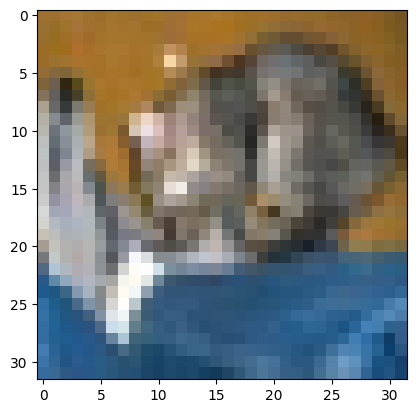

In [11]:
print(y_test[0])
plt.imshow(x_test[0])

In [12]:
S = 0
for i in range(len(x_test)):
    rasm = np.expand_dims(x_test[i],0)
    y = np.argmax(model.predict(rasm))
    x = 1 if y==y_test[i] else 0
    S += x
print(S/len(x_test))

1/1 [==============================] - 0s 43ms/step
1
1/1 [==============================] - 0s 43ms/step
1
1/1 [==============================] - 0s 42ms/step
2
1/1 [==============================] - 0s 45ms/step
3
1/1 [==============================] - 0s 46ms/step
3
1/1 [==============================] - 0s 49ms/step
4
1/1 [==============================] - 0s 40ms/step
4
1/1 [==============================] - 0s 49ms/step
5
1/1 [==============================] - 0s 50ms/step
5
1/1 [==============================] - 0s 44ms/step
6
1/1 [==============================] - 0s 52ms/step
6
1/1 [==============================] - 0s 39ms/step
7
1/1 [==============================] - 0s 55ms/step
7
1/1 [==============================] - 0s 116ms/step
8
1/1 [==============================] - 0s 42ms/step
8
1/1 [==============================] - 0s 48ms/step
9
1/1 [==============================] - 0s 46ms/step
9
1/1 [==============================] - 0s 44ms/step
9
1/1 [======================

KeyboardInterrupt: 

In [ ]:
def modelize():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(1500,activation = 'relu'),
        keras.layers.Dense(500,activation = 'relu'),
        keras.layers.Dense(10,activation = 'sigmoid')
    ])

    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
with tf.device('/CPU:0'):
    model_cpu = modelize()
    model_cpu.fit(x_test,y_test,epochs=5)

In [ ]:
with tf.device('/GPU:0'):
    model_gpu = modelize()
    model_gpu.fit(x_test,y_test,epochs=5)